In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv("./29-country_data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [41]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [42]:
import math

def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

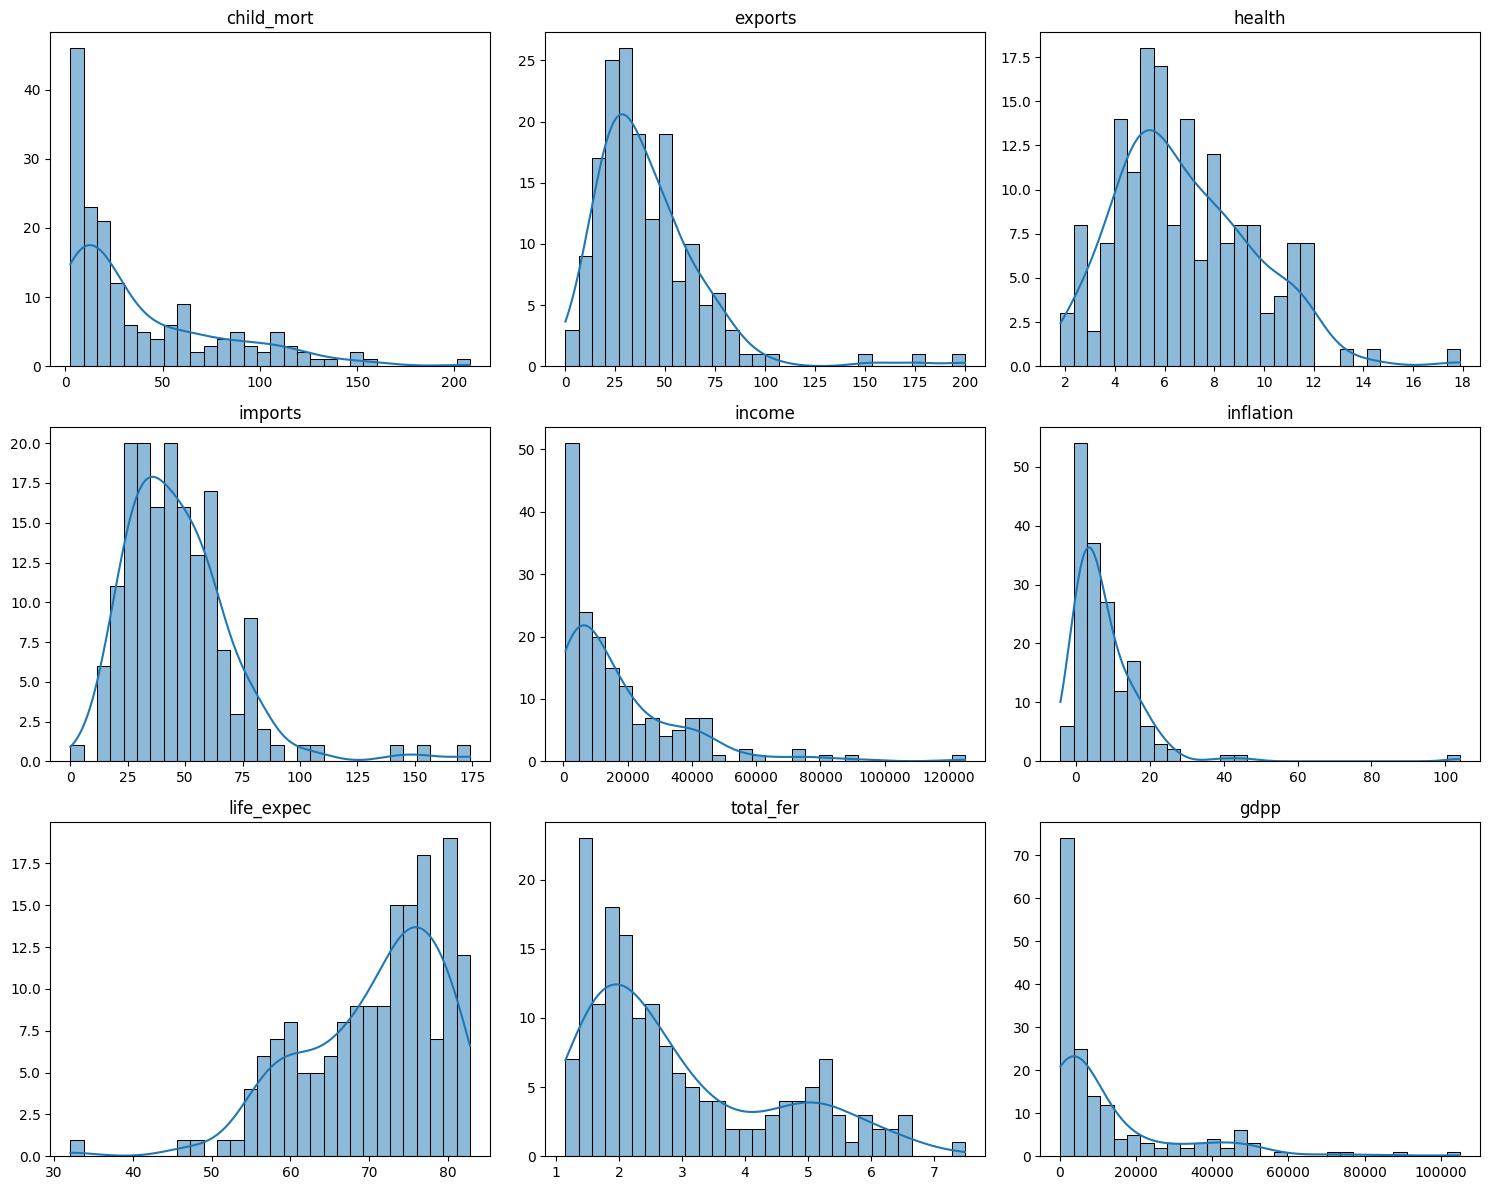

In [43]:
plot_all_histograms(df)

<Axes: >

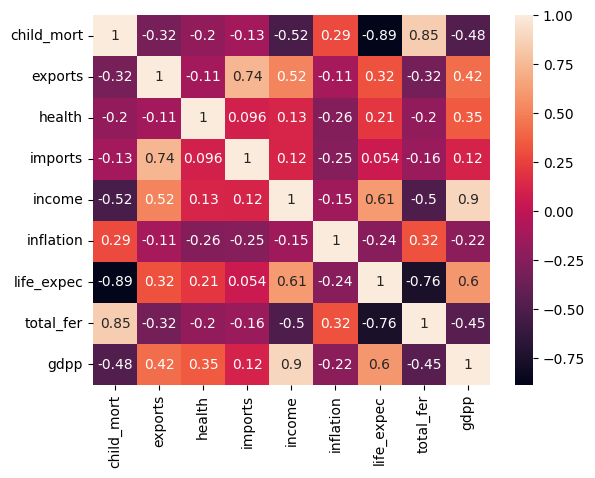

In [44]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [45]:
df2=df.drop("country",axis=True)

In [46]:
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [47]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

df2=scaler.fit_transform(df2)

columns=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

df2=pd.DataFrame(df2,columns=columns)

df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


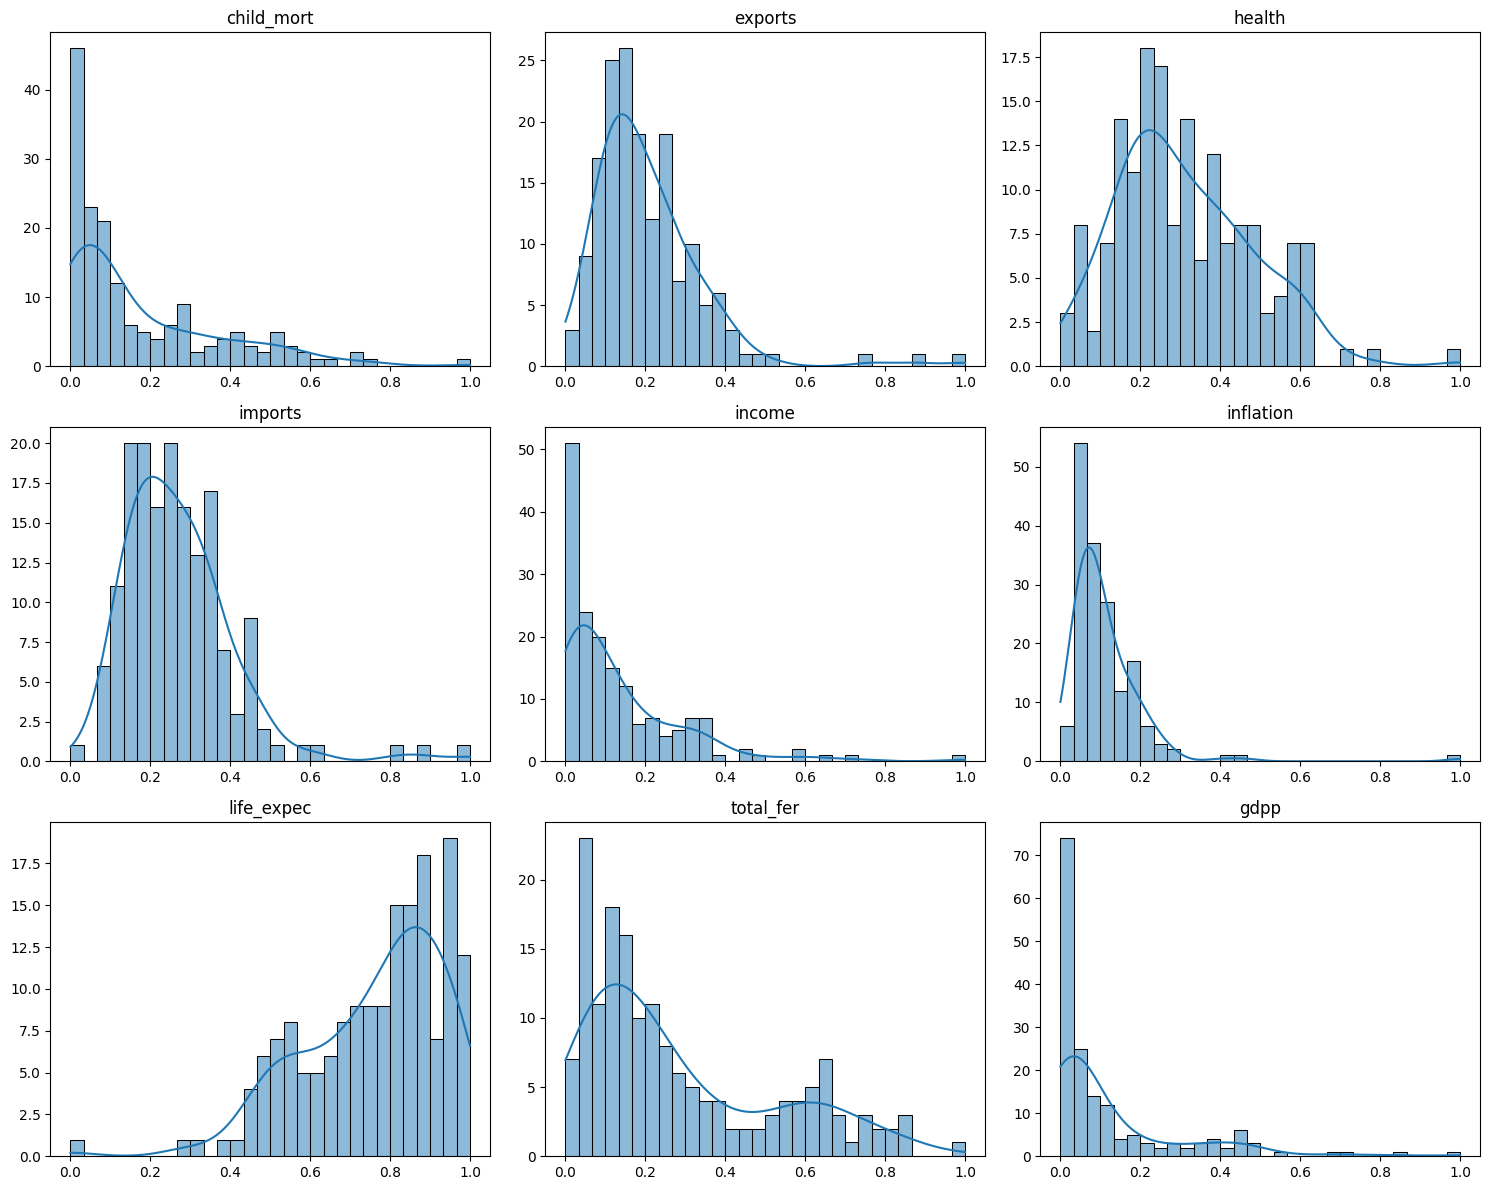

In [49]:

plot_all_histograms(df2)

In [50]:
from sklearn.decomposition import PCA

pca=PCA()

pca_df2=pd.DataFrame(pca.fit_transform(df2))

pca_df2

,0,1,2,3,4,5,6,7,8
0,0.599078,0.095490,0.157554,0.024333,0.045618,-0.046532,-0.076803,-0.040610,0.023572
1,-0.158474,-0.212092,-0.064189,0.061247,-0.014191,-0.010246,0.043567,-0.030842,0.029833
2,-0.003686,-0.135867,-0.134182,-0.133574,0.091150,0.025988,0.045604,0.010198,0.003012
3,0.650235,0.275975,-0.142672,-0.156018,0.081997,0.032170,0.073985,0.045195,-0.042241
4,-0.200711,-0.064662,-0.100715,0.037902,0.035799,-0.055817,0.009559,-0.026228,0.022455
...,...,...,...,...,...,...,...,...,...
162,0.160078,-0.029625,-0.121910,0.066099,0.009043,-0.063646,-0.115254,0.003232,-0.065701
163,-0.061133,-0.171339,-0.058586,-0.247460,0.093260,0.291515,-0.005521,-0.056038,-0.036459
164,-0.115512,-0.032034,-0.195243,0.231993,0.035734,0.089237,0.039743,0.006124,-0.017780
165,0.332968,-0.019824,-0.029989,-0.105416,0.141550,0.063254,-0.012519,-0.014231,-0.011441


In [51]:
pca.explained_variance_

array([0.14180615, 0.03450913, 0.03171502, 0.02513534, 0.00974048,
       0.00776992, 0.00306922, 0.00228894, 0.00178941])

In [52]:

pca.explained_variance_ratio_

array([0.55001227, 0.13384784, 0.12301053, 0.09749047, 0.03777964,
       0.03013659, 0.01190434, 0.00887791, 0.00694042])

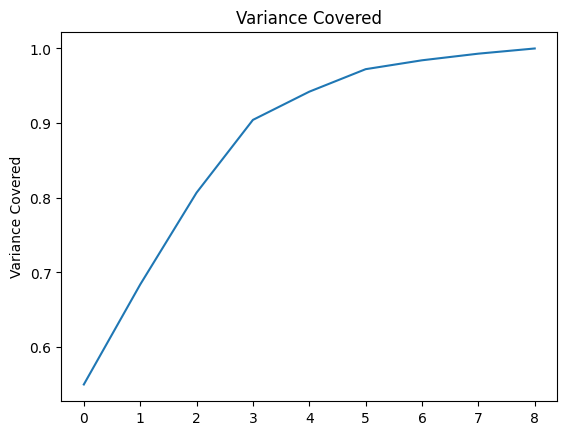

In [53]:
plt.plot(np.cumulative_sum(pca.explained_variance_ratio_))
plt.ylabel("Variance Covered")
plt.title("Variance Covered")
plt.show()

## total variance covered= PC1+PC2+PC3 = 0.55+0.13+0.12~0.90 

In [54]:
pca_df2_dropped=pca_df2.drop(columns=[3,4,5,6,7,8])

In [55]:
pca_df2_dropped

,0,1,2
0,0.599078,0.095490,0.157554
1,-0.158474,-0.212092,-0.064189
2,-0.003686,-0.135867,-0.134182
3,0.650235,0.275975,-0.142672
4,-0.200711,-0.064662,-0.100715
...,...,...,...
162,0.160078,-0.029625,-0.121910
163,-0.061133,-0.171339,-0.058586
164,-0.115512,-0.032034,-0.195243
165,0.332968,-0.019824,-0.029989


In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss=[]
for k in range(1,11): #try k numbers from 1 to 11
    kmeans=KMeans(n_clusters=k,init="k-means++") 
    kmeans.fit(pca_df2_dropped)
    wcss.append(kmeans.inertia_)


wcss

[34.533029253081764,
 17.68595420957708,
 11.270622261541497,
 9.597253537403713,
 7.594099637289839,
 6.243335312068013,
 5.963980666933096,
 4.80014642722823,
 4.72968359600423,
 3.9700889499366863]

<function matplotlib.pyplot.show(close=None, block=None)>

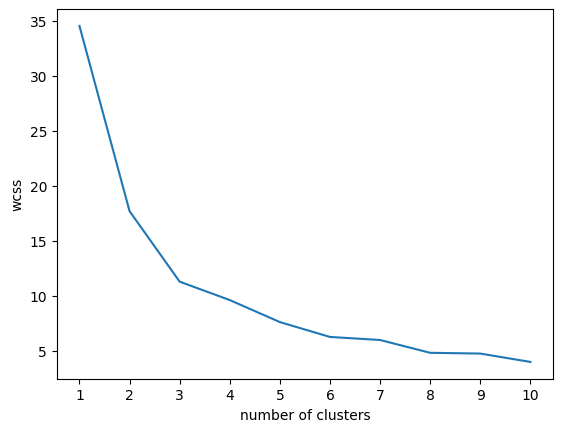

In [57]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show



In [58]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing") #make sure you specify convex or concave in curve
kl.elbow 

### Comparing above calculation with Knee locater

np.int64(3)

In [59]:
model=KMeans(n_clusters=3)
model.fit(pca_df2_dropped)
model.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [60]:
labels=model.labels_

silhouette_score(pca_df2_dropped,labels)

0.43863203452366817

In [61]:
df["Class"]=labels
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


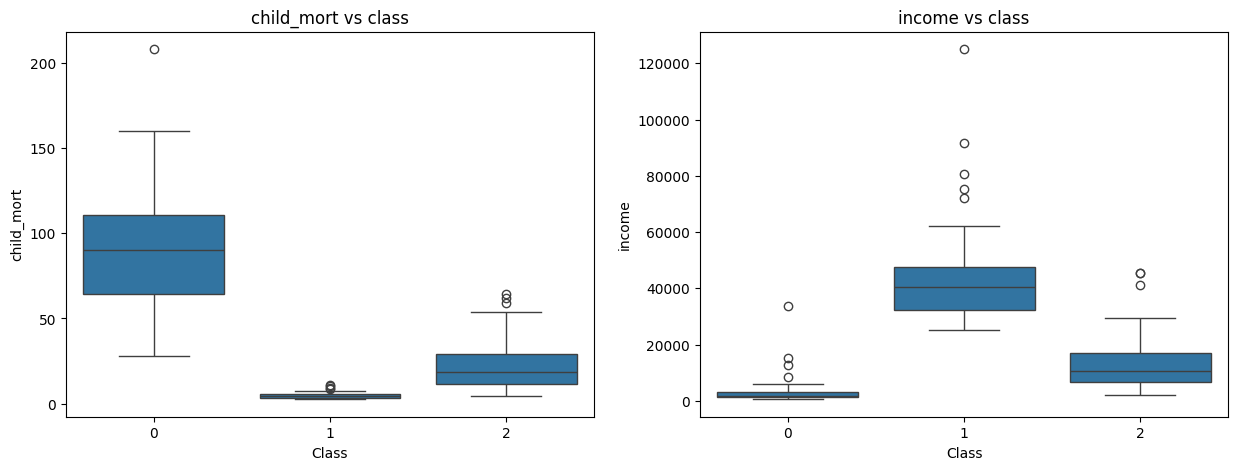

In [62]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, x="Class", y="child_mort")
plt.title("child_mort vs class")

plt.subplot(1,2,2)
sns.boxplot(data=df, x="Class", y="income")
plt.title("income vs class")

plt.show()

In [63]:
#0->no budget needed
#1->budget needed
#2->in between